In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### read the dataset

In [28]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [29]:
df.shape

(8950, 18)

In [30]:
df['CUST_ID'].nunique()

8950

### handling null values

In [31]:
nv = df.isnull().sum()
nv[nv>0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [9]:
df['MINIMUM_PAYMENTS'].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [15]:
df['CREDIT_LIMIT'].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [32]:
df.dropna(inplace=True,axis=0)

In [33]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [34]:
df.shape

(8636, 18)

### handling duplicates

In [35]:
df.duplicated().sum()

0

In [36]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### EDA

In [47]:
for i in df.columns[1:]:
    print(f'Feature: {i}')
    print(f'Number of categories: {df[i].nunique()}')
    print('*'*30)

Feature: BALANCE
Number of categories: 8032
******************************
Feature: BALANCE_FREQUENCY
Number of categories: 36
******************************
Feature: PURCHASES
Number of categories: 5497
******************************
Feature: ONEOFF_PURCHASES
Number of categories: 3404
******************************
Feature: INSTALLMENTS_PURCHASES
Number of categories: 3829
******************************
Feature: CASH_ADVANCE
Number of categories: 3688
******************************
Feature: PURCHASES_FREQUENCY
Number of categories: 47
******************************
Feature: ONEOFF_PURCHASES_FREQUENCY
Number of categories: 46
******************************
Feature: PURCHASES_INSTALLMENTS_FREQUENCY
Number of categories: 47
******************************
Feature: CASH_ADVANCE_FREQUENCY
Number of categories: 26
******************************
Feature: CASH_ADVANCE_TRX
Number of categories: 15
******************************
Feature: PURCHASES_TRX
Number of categories: 53
******************

### statistical description

In [37]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,2.522951,4.956168,7.316636,10.200256,13.209472,916.855459,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.181818,0.272727,0.272727,0.363636,0.363636,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.405000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.995000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.785000,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.50000


In [38]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,916.855459,5936.635587,6524.977300,7155.205505,8035.403185,9369.550879,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,375.405000,4060.092500,4551.788000,5233.642000,6428.649000,9127.092000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,44.995000,2728.372500,3154.222000,3666.489500,4506.919000,6783.896500,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,94.785000,1800.000000,1993.210000,2299.970500,2802.658000,3916.483000,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,4721.415498,5314.332019,6085.695184,7414.039028,9681.634354,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.083333,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.166667,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.583333,0.615000,0.666667,0.750000,0.833333,1.50000


### Outlier treatment

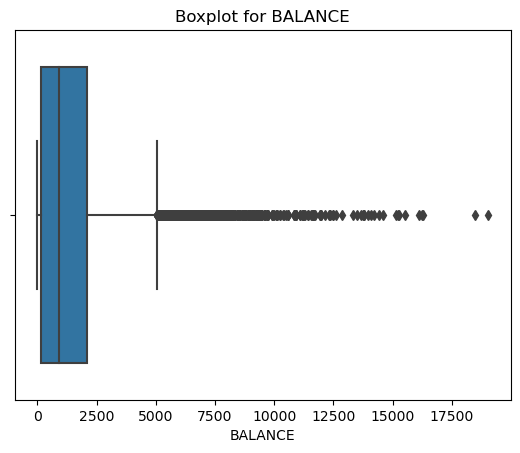

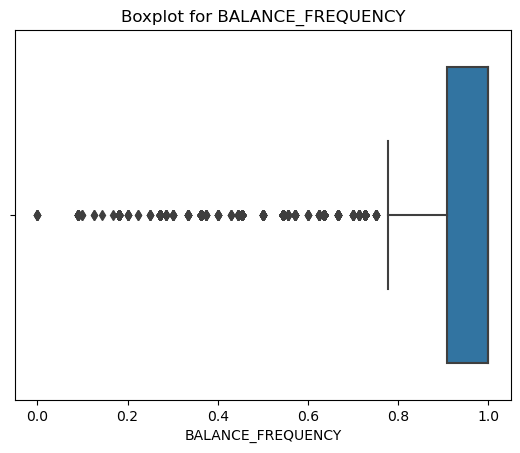

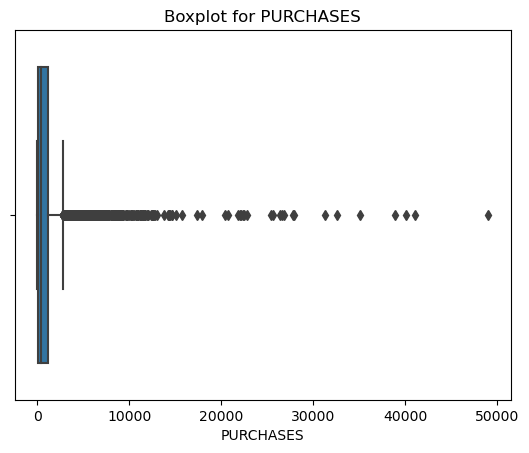

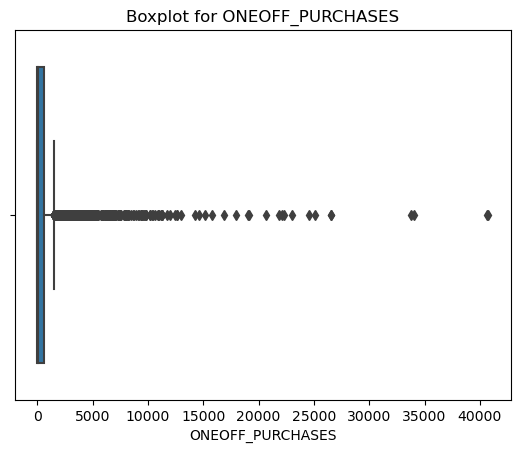

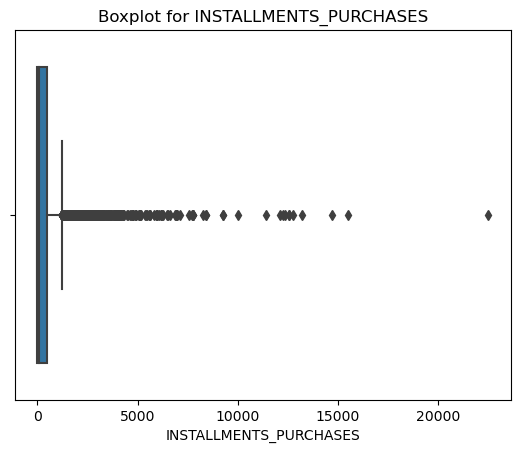

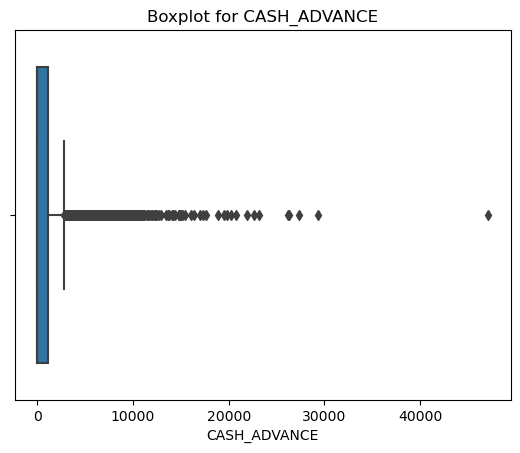

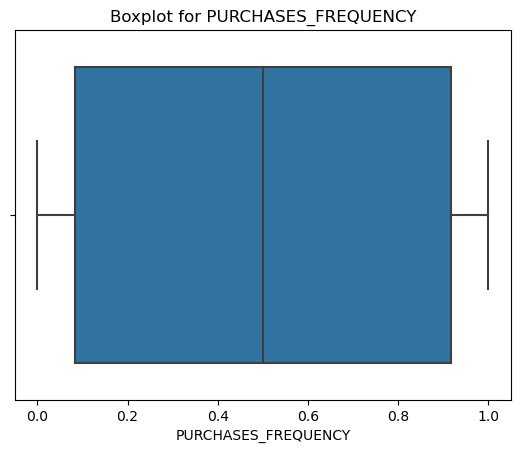

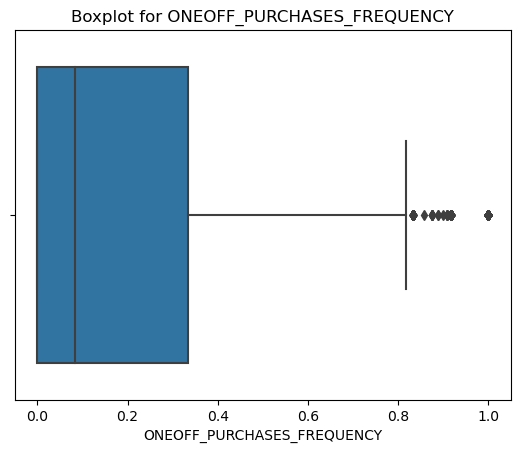

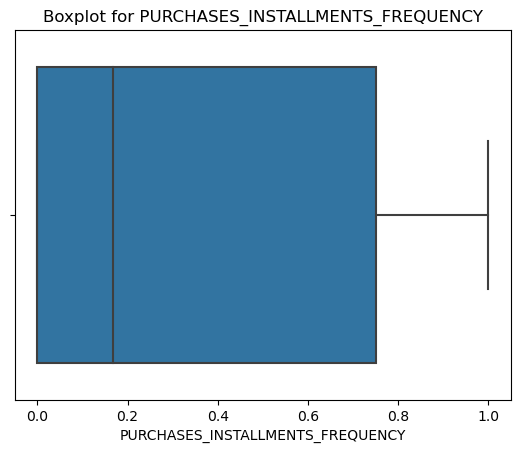

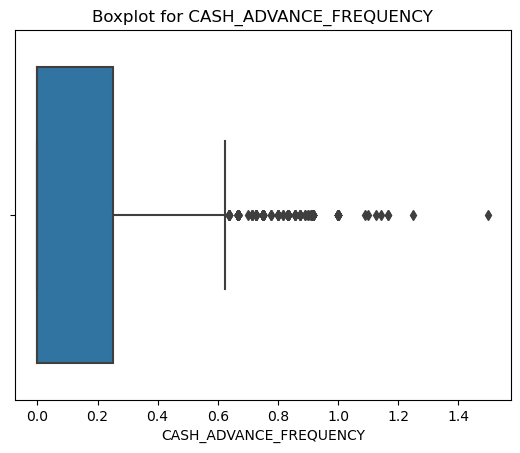

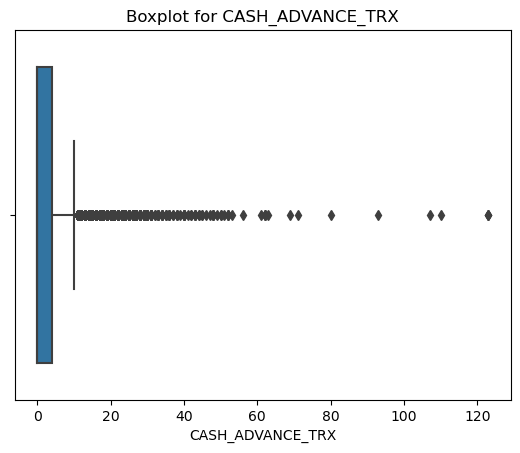

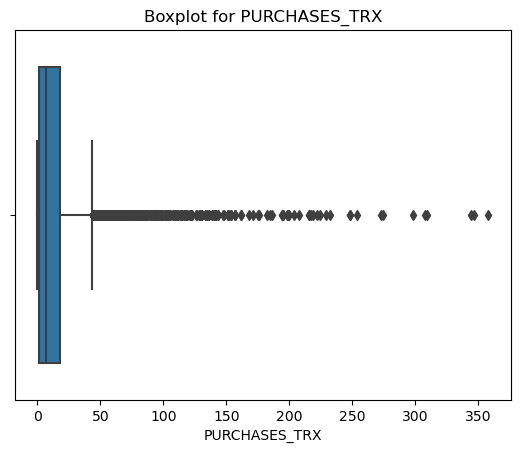

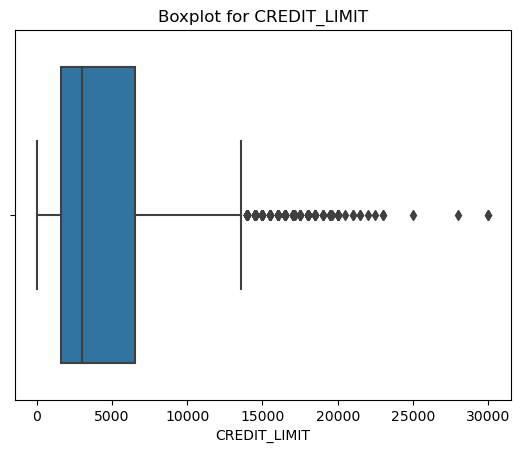

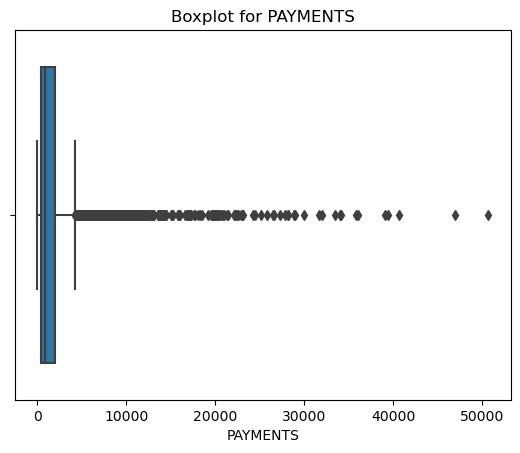

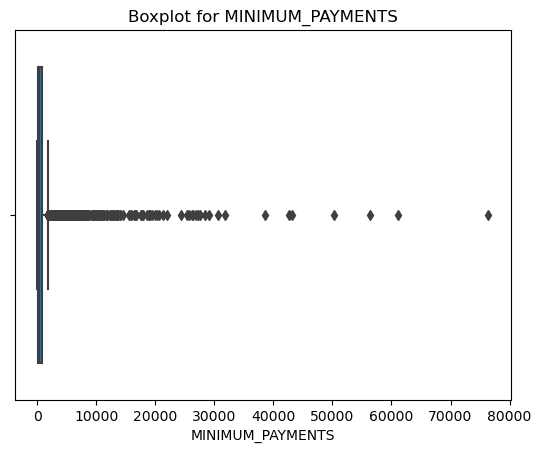

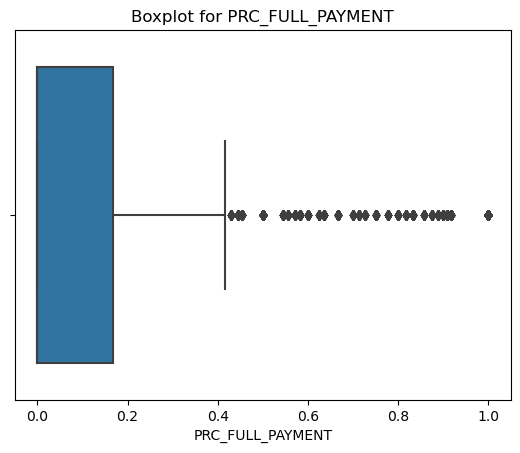

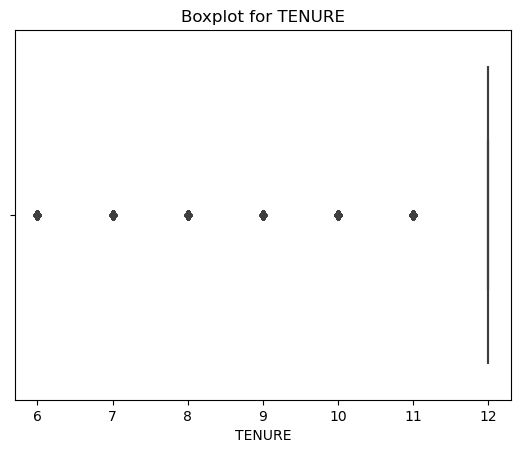

In [43]:
for i in df.columns[1:]:
#     print(i)
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [61]:
out_cols1 = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
       'ONEOFF_PURCHASES_FREQUENCY', 
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [62]:
def oh1(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [63]:
df[out_cols1] = df[out_cols1].apply(oh1)

In [64]:
out_cols2 = ['BALANCE_FREQUENCY']

In [65]:
def oh2(x):
    x = x.clip(lower=x.quantile(0.02))
    return x

In [66]:
df[out_cols2] = df[out_cols2].apply(oh2)

### Correlation

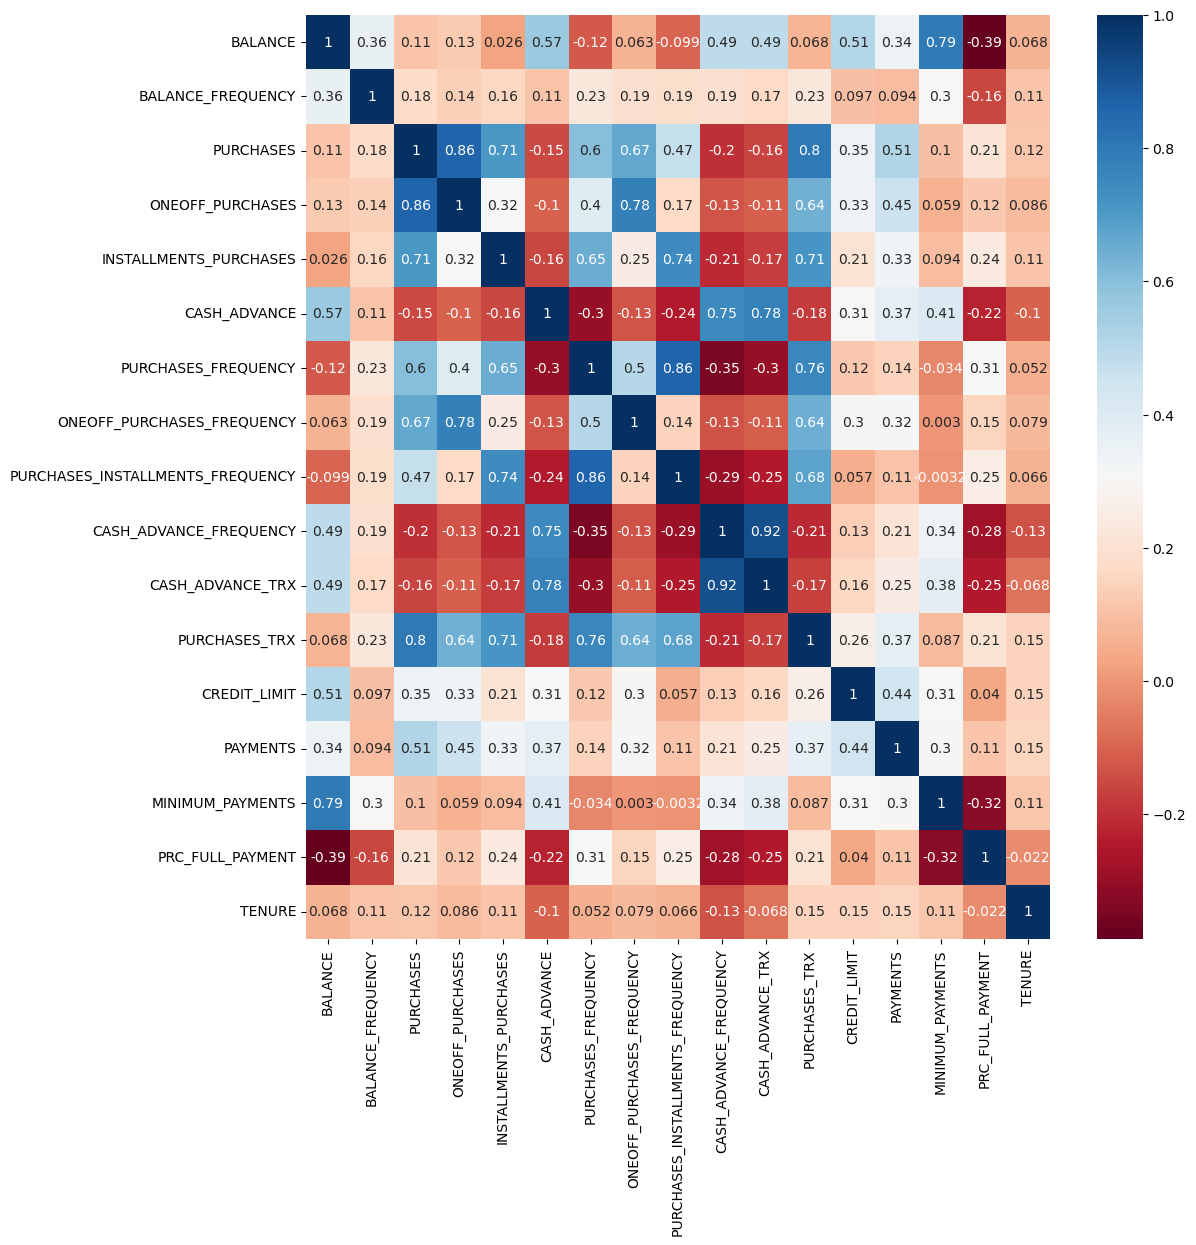

In [67]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

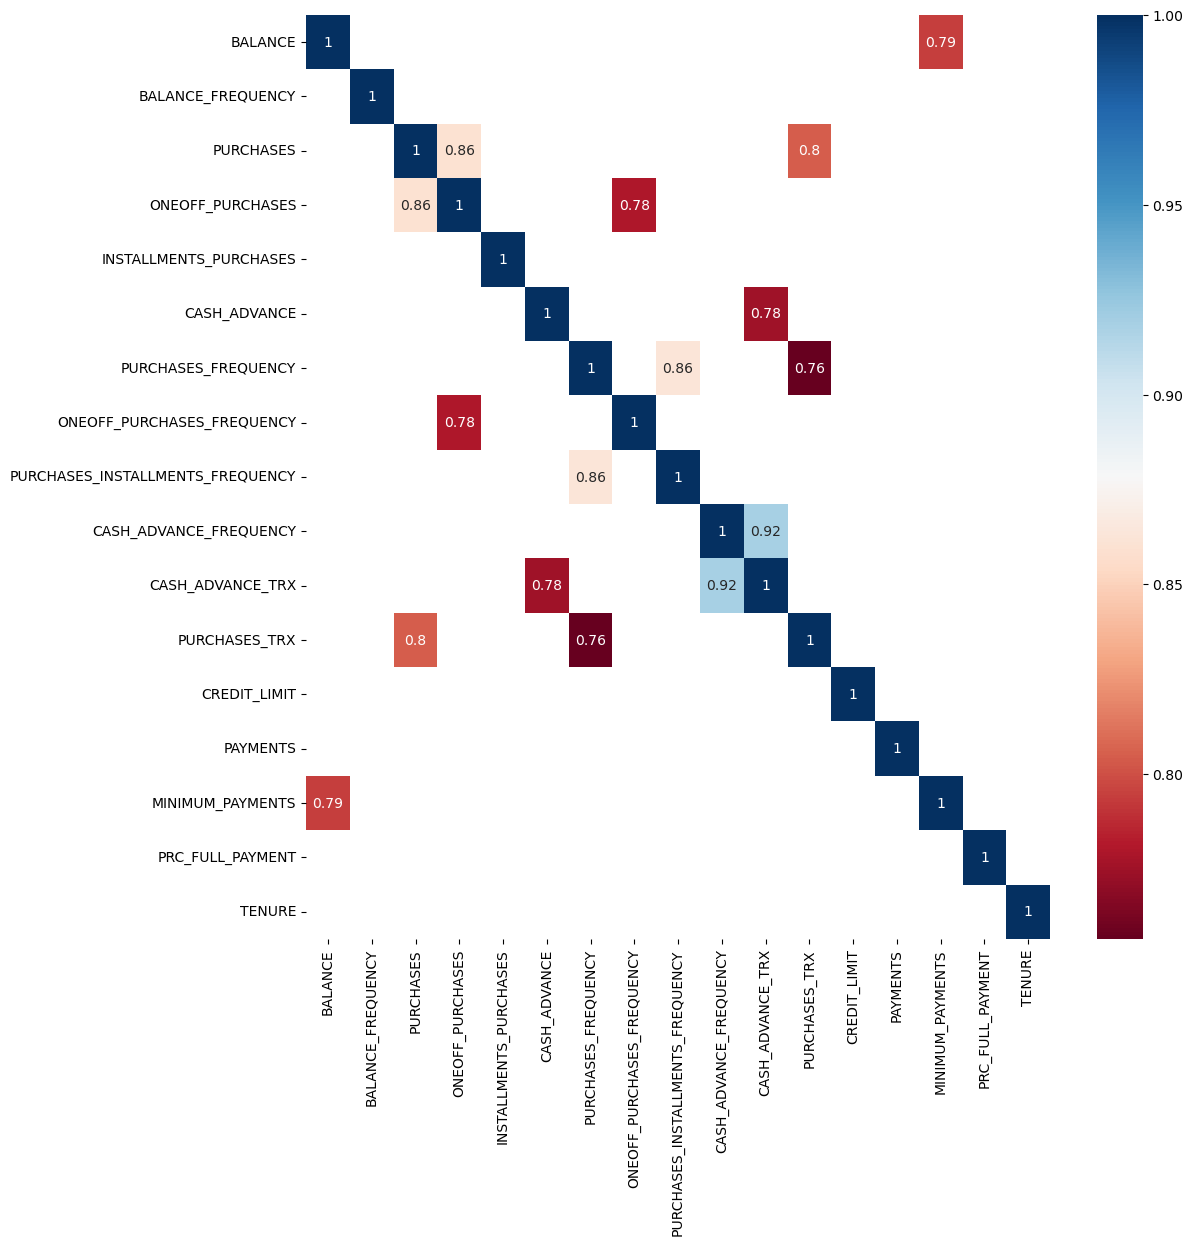

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(corr[abs(corr)>0.75],annot=True,cmap='RdBu')
plt.show()

In [69]:
df.drop(['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_TRX'],axis=1,inplace=True)

## PCA - PRINCIPAL COMPONENT ANALYSIS

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [73]:
data = df.drop('CUST_ID',axis=1)

In [74]:
sc = StandardScaler()
sc.fit(data)
data_sc = sc.transform(data)
print(data_sc.shape)

(8636, 14)


In [76]:
pca1 = PCA()
pca1.fit(data_sc)

data_pc = pca1.transform(data_sc)
print(data_pc.shape)

(8636, 14)


In [77]:
eig_val1 = pd.DataFrame({'Var':pca1.explained_variance_})
eig_val1.head()

,Var
0,4.124349
1,3.254544
2,1.328811
3,1.207553
4,0.898814


In [78]:
evr = pd.DataFrame({'EVR':pca1.explained_variance_ratio_*100})
evr.head()  #EVR: EXPLAINED VARIANCE RATIO

,EVR
0,29.456225
1,23.244053
2,9.490405
3,8.624382
4,6.419353


In [79]:
eig_val1['EVR'] = eig_val1['Var']*100/eig_val1['Var'].sum()
eig_val1.head()

,Var,EVR
0,4.124349,29.456225
1,3.254544,23.244053
2,1.328811,9.490405
3,1.207553,8.624382
4,0.898814,6.419353


In [80]:
eig_val1['EVR_CumSum'] = eig_val1['EVR'].cumsum()
eig_val1.tail()

,Var,EVR,EVR_CumSum
9,0.268935,1.920740,96.752729
10,0.194907,1.392034,98.144763
11,0.137283,0.980477,99.125240
12,0.072715,0.519335,99.644575
13,0.049765,0.355425,100.000000


In [81]:
eig_val1[eig_val1['EVR_CumSum']<96].tail()

,Var,EVR,EVR_CumSum
4,0.898814,6.419353,77.234418
5,0.836258,5.972582,83.207000
6,0.631122,4.507492,87.714492
7,0.542206,3.872450,91.586942
8,0.454359,3.245047,94.831989


In [ ]:
### INFERENCE : selecting 9 features out of 14 such that 95% of the variance is explained

In [82]:
data_res = pd.DataFrame(data_pc)
data_res.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.153356,-2.174634,-0.559857,-0.656923,0.090566,-0.366765,0.331629,0.154329,0.197344,0.028853,0.209290,0.080046,0.088734,-0.016417
1,3.112822,-0.086906,1.154809,-0.904097,-0.974550,0.293397,-0.489358,0.731321,0.863085,1.279486,0.579919,-0.077075,-0.398349,0.066973
2,-0.654218,1.471464,-0.662462,-1.138648,1.904125,-0.453725,-0.629814,-1.201053,-0.786393,1.030257,-0.520600,-0.238420,0.179473,-0.559008
3,-0.684794,-1.797117,-0.923320,-0.772292,0.436237,-0.696207,-0.219709,0.543485,0.446753,0.156980,0.100828,-0.130657,0.160030,0.104460
4,-0.114160,0.700937,-2.206644,-0.215017,-0.409759,0.985620,0.500824,1.509521,-0.733071,-0.201898,-0.035330,0.952989,-0.147571,-0.153141


In [83]:
data1 = data_res.iloc[:,:9]
print(data1.shape)
data1.head()

(8636, 9)


,0,1,2,3,4,5,6,7,8
0,-1.153356,-2.174634,-0.559857,-0.656923,0.090566,-0.366765,0.331629,0.154329,0.197344
1,3.112822,-0.086906,1.154809,-0.904097,-0.974550,0.293397,-0.489358,0.731321,0.863085
2,-0.654218,1.471464,-0.662462,-1.138648,1.904125,-0.453725,-0.629814,-1.201053,-0.786393
3,-0.684794,-1.797117,-0.923320,-0.772292,0.436237,-0.696207,-0.219709,0.543485,0.446753
4,-0.114160,0.700937,-2.206644,-0.215017,-0.409759,0.985620,0.500824,1.509521,-0.733071


### ELBOW METHOD

WCSS
 [89168.92513916637, 73624.05274192603, 64828.62664397816, 58132.94080477159, 54035.88944776076, 49653.55017815803, 46349.30773706609, 43882.50510158347, 41817.032770531325, 39889.63318216667, 38730.02635827451, 36869.51789393761, 35710.516783617975, 34648.05156184041, 33600.644473748194, 32705.79733231866, 31759.721374225002, 31022.124998573858, 30238.510683509572]


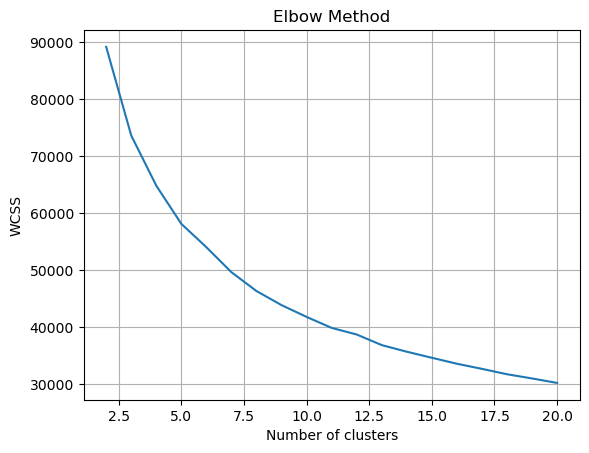

In [84]:
wcss = []
sscore = []
for i in range(2,21):
    m = KMeans(n_clusters=i,random_state=0)
    m.fit(data1)
    wcss.append(m.inertia_)
    sscore.append(silhouette_score(data1, m.labels_))
    
print('WCSS\n',wcss)

plt.plot(list(range(2,21)), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### SILHOUETTE SCORE

In [85]:
sil_score = pd.DataFrame({'Number_of_Clusters':list(range(2,21)), 'Sil_Score':sscore})
sil_score

,Number_of_Clusters,Sil_Score
0,2,0.248156
1,3,0.211128
2,4,0.206017
3,5,0.223089
4,6,0.211461
5,7,0.219251
6,8,0.223492
7,9,0.216266
8,10,0.219293
9,11,0.223873


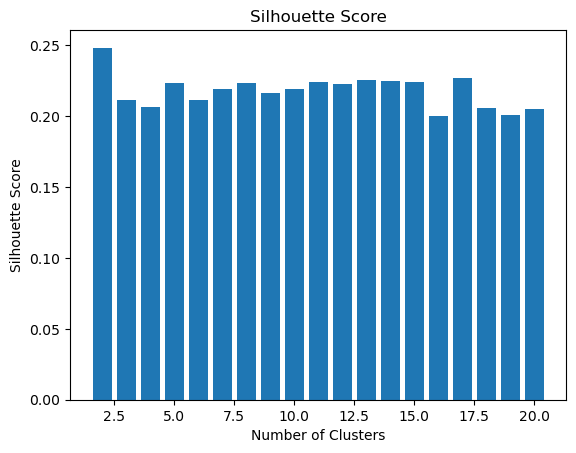

In [86]:
plt.bar(sil_score['Number_of_Clusters'], sil_score['Sil_Score'])
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()